In [2]:
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import itertools
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [4]:
data = pd.read_excel('C:/Users/ravit/Downloads/car prediction.xlsx')

In [5]:
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data2=data.drop(['Column7'],axis=1)

In [7]:
data3=data.drop(['Column7'],axis=1)

In [8]:
data2.head()

,Column1,Column2,Column3,Column4,Column5,Column6
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = {}
columns_to_encode = ['Column1', 'Column2', 'Column3','Column4','Column5','Column6']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in columns_to_encode:
    data2[col] = label_encoder.fit_transform(data2[col])

print(data2)

      Column1  Column2  Column3  Column4  Column5  Column6
0           3        3        0        0        2        1
1           3        3        0        0        2        2
2           3        3        0        0        2        0
3           3        3        0        0        1        1
4           3        3        0        0        1        2
...       ...      ...      ...      ...      ...      ...
1723        1        1        3        2        1        2
1724        1        1        3        2        1        0
1725        1        1        3        2        0        1
1726        1        1        3        2        0        2
1727        1        1        3        2        0        0

[1728 rows x 6 columns]


In [11]:
data2.head()

,Column1,Column2,Column3,Column4,Column5,Column6
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [16]:
pca = PCA(n_components=2)

In [40]:
scaler = StandardScaler()
scaler.fit_transform(data2)

array([[ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
        -1.22474487],
       ...,
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         0.        ],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         1.22474487],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
        -1.22474487]])

In [41]:
scaled_data = scaler.transform(data2)

In [42]:
pca.fit(scaled_data)

PCA(n_components=2)

In [43]:
scaled_data.shape

(1728, 6)

In [13]:
from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder()
data['Code_le'] = le.fit_transform(data.Column7)
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Code_le
0,vhigh,vhigh,2,2,small,low,unacc,2
1,vhigh,vhigh,2,2,small,med,unacc,2
2,vhigh,vhigh,2,2,small,high,unacc,2
3,vhigh,vhigh,2,2,med,low,unacc,2
4,vhigh,vhigh,2,2,med,med,unacc,2


In [14]:
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Code_le
0,vhigh,vhigh,2,2,small,low,unacc,2
1,vhigh,vhigh,2,2,small,med,unacc,2
2,vhigh,vhigh,2,2,small,high,unacc,2
3,vhigh,vhigh,2,2,med,low,unacc,2
4,vhigh,vhigh,2,2,med,med,unacc,2


In [46]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

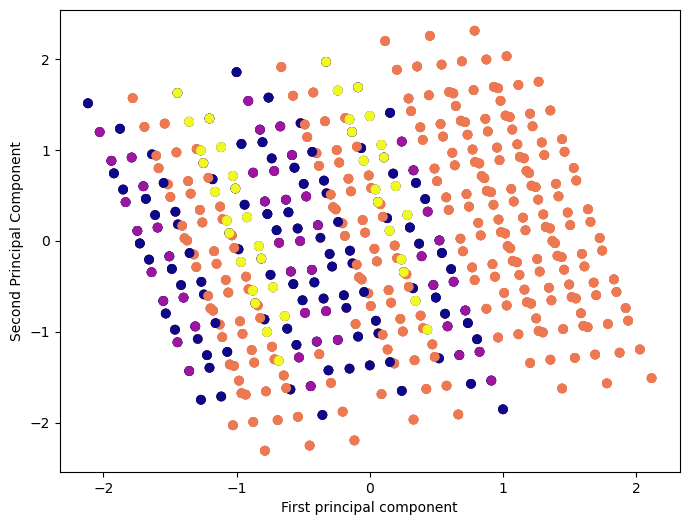

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Code_le'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [27]:
y= data.iloc[:,-1]  

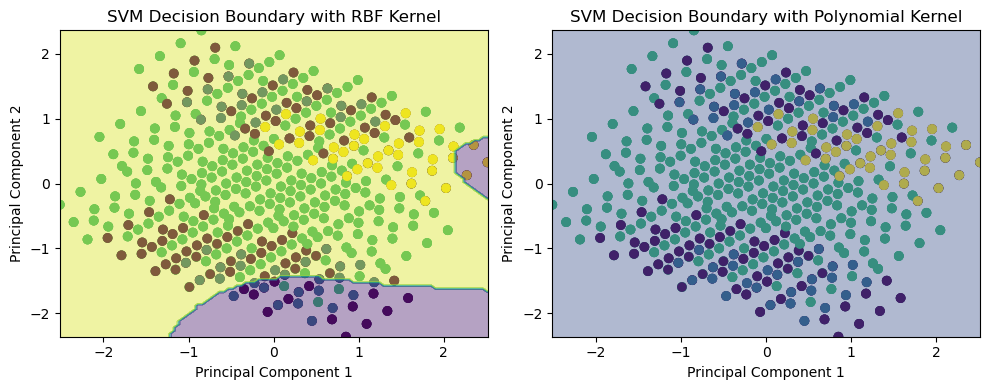

In [72]:
svm_rbf_classifier = SVC(kernel='rbf')
svm_rbf_classifier.fit(x_pca, y)

# Polynomial kernel
svm_poly_classifier = SVC(kernel='poly')
svm_poly_classifier.fit(x_pca, y)

# Step 4: Get the decision boundary lines for RBF and Polynomial kernels
# The RBF kernel does not have a straightforward linear decision boundary representation.
# However, we can visualize the decision boundary by creating a contour plot.

# Generate grid points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(x_pca[:, 0].min(), x_pca[:, 0].max(), 100),
                     np.linspace(x_pca[:, 1].min(), x_pca[:, 1].max(), 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class labels for the grid points
z_rbf = svm_rbf_classifier.predict(grid_points).reshape(xx.shape)
z_poly = svm_poly_classifier.predict(grid_points).reshape(xx.shape)

# Plot the data points and the decision boundaries
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.contourf(xx, yy, z_rbf, alpha=0.4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with RBF Kernel')

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.contourf(xx, yy, z_poly, alpha=0.4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with Polynomial Kernel')

plt.tight_layout()
plt.show()


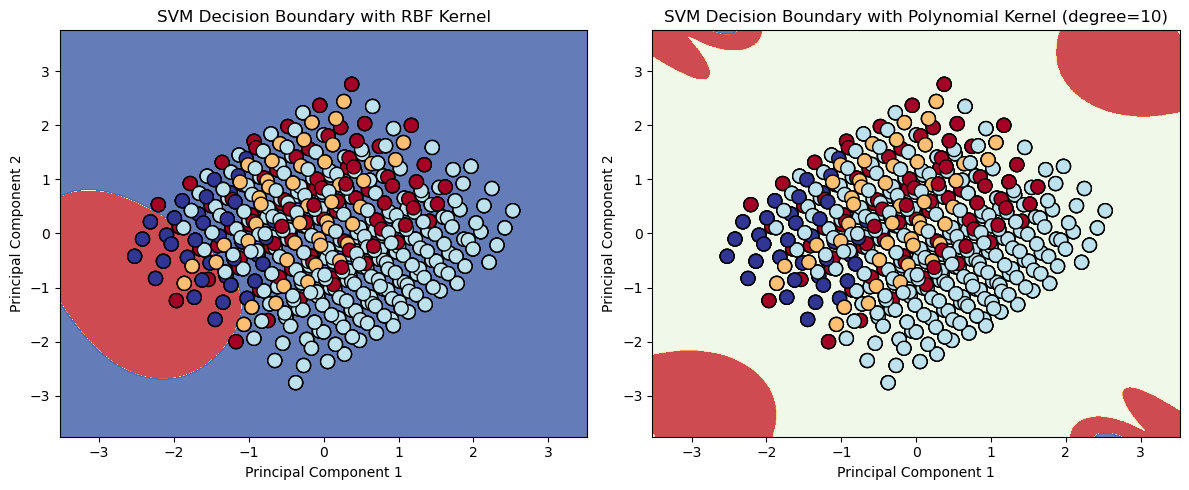

In [100]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt



X = data2
y= data.iloc[:,-1] 

# Step 1: Preprocess your data (if needed)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Step 2: Fit the PCA model to your data and transform the data to its lower-dimensional representation
n_components = 2  # Choose the number of components you want to retain
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(scaled_data)

# Step 3: Fit the SVM classifiers to the transformed data with different kernels

# RBF kernel
svm_rbf_classifier = SVC(kernel='rbf')
svm_rbf_classifier.fit(x_pca, y)

# Polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=10)  # Set the degree of the polynomial (default is 3)
svm_poly_classifier.fit(x_pca, y)

# Step 4: Get the decision boundary for multiclass classification

# Generate grid points to plot the decision boundaries
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for the grid points
Z_rbf = svm_rbf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

Z_poly = svm_poly_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_rbf, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu, s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with RBF Kernel')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_poly, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu, s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with Polynomial Kernel (degree=10)')

plt.tight_layout()
plt.show()


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


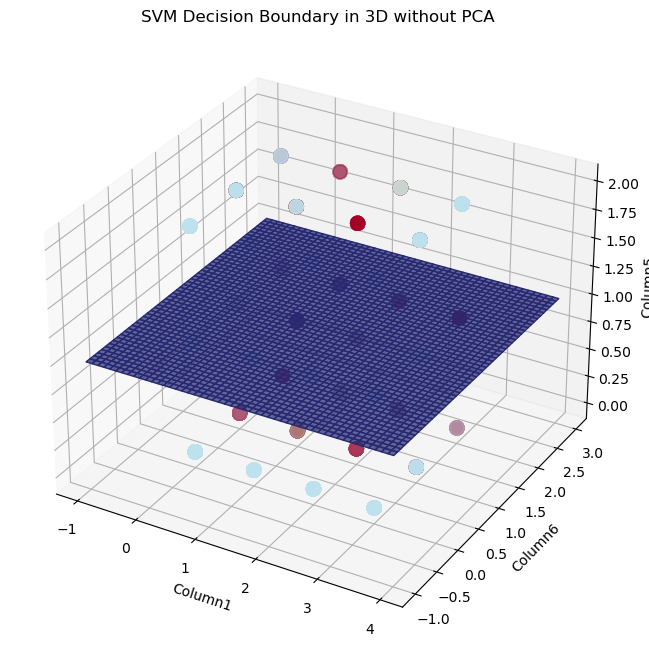

In [110]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset

X = data2[['Column1','Column4','Column5']].values
y= data[['Code_le']].values

# Convert the data to a Pandas DataFrame
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X, y)

# Step 2: Create a meshgrid to plot the decision boundaries in 3D

# Generate grid points for the first two features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Generate grid points for the third feature
mean_third_feature = X[:, 2].mean()
zz = np.ones(xx.shape) * mean_third_feature

# Step 3: Predict the class labels for the grid points and plot the decision boundaries in 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Predict the class labels for the grid points
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = svm_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries in 3D
ax.plot_surface(xx, yy, zz, facecolors=plt.cm.RdYlBu(Z / 2), alpha=0.7)

# Plot the data points in 3D
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, s=100)

# Set axis labels
ax.set_xlabel(data2.columns[0])
ax.set_ylabel(data2.columns[5])
ax.set_zlabel(data2.columns[4])

# Set the plot title
plt.title('SVM Decision Boundary in 3D without PCA')

plt.show()

C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


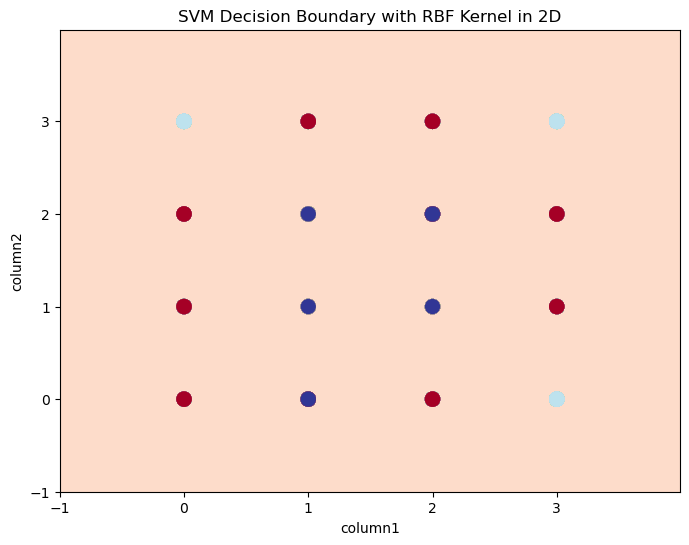

In [114]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your scaled data in a Pandas DataFrame called 'df' with feature columns and target column 'target'

X = data2[['Column1','Column2']].values
y= data[['Code_le']].values

# Create the SVM classifier with 'rbf' kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X, y)

# Step 2: Create a meshgrid to plot the decision boundary in 2D

# Generate grid points for the first two features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for the grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary in 2D
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

# Plot the data points in 2D
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=100)

# Set axis labels and title
plt.xlabel('column1')
plt.ylabel('column2')
plt.title('SVM Decision Boundary with RBF Kernel in 2D')

plt.show()


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in a Pandas DataFrame called 'data'
# and the target column is named 'target'

# Separate features (X) and target (y)
X = data2[['Column1','Column2','Column3','Column4','Column5','Column6']].values
y= data[['Code_le']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Logistic Regression model with 'multinomial' solver for multiclass problems
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the intercepts (bias) for each class
intercepts = logistic_model.intercept_
print("Intercepts for each class:")
for class_idx, intercept in enumerate(intercepts):
    print(f"Class {class_idx}: {intercept:.2f}")


Accuracy: 0.66
Intercepts for each class:
Class 0: -0.00
Class 1: -1.54
Class 2: 1.79
Class 3: -0.25


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


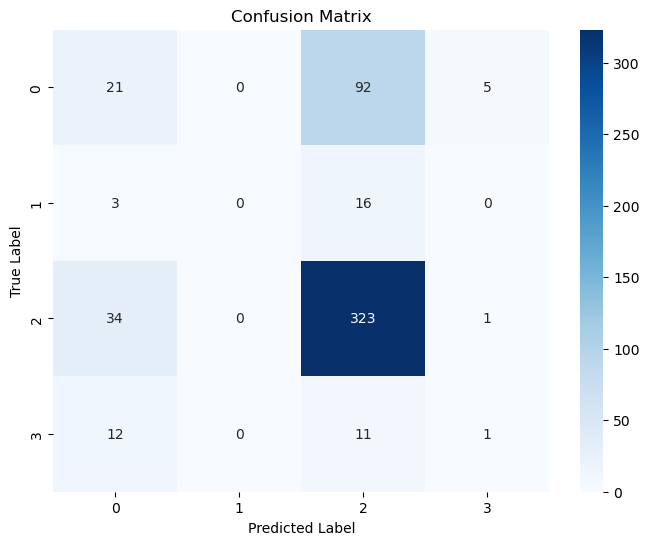

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
unique_classes, class_counts = np.unique(y_test, return_counts=True)

# Print the data count for each class in y_test
print("Data count for each class in y_test:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class '{cls}': {count}")

Data count for each class in y_test:
Class '0': 118
Class '1': 19
Class '2': 358
Class '3': 24


In [125]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Assuming you have your data in a Pandas DataFrame called 'data'
# and the target column is named 'target'

# Separate features (X) and target (y)
X = data2[['Column1','Column2','Column3','Column4','Column5','Column6']].values
y= data[['Code_le']].values

# Create the Logistic Regression model with 'multinomial' solver for multiclass problems
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Perform 5-fold cross-validation and get accuracy scores for each fold
cross_val_accuracy = cross_val_score(logistic_model, X, y, cv=5, scoring=make_scorer(accuracy_score))

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:")
print(cross_val_accuracy)

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = cross_val_accuracy.mean()
std_accuracy = cross_val_accuracy.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")


Accuracy scores for each fold:
[0.63583815 0.65028902 0.60115607 0.67826087 0.68115942]
Mean Accuracy: 0.65
Standard Deviation of Accuracy: 0.03


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Load your dataset with categorical independent features (X) and the target variable (y)
X = data3[['Column1','Column2','Column3','Column4','Column5','Column6']].values
y= data[['Code_le']].values
# One-hot encode the categorical features in X
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the Logistic Regression model
logistic_model = LogisticRegression()

cross_val_accuracy = cross_val_score(logistic_model,X_encoded, y, cv=5, scoring=make_scorer(accuracy_score))

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:")
print(cross_val_accuracy)

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = cross_val_accuracy.mean()
std_accuracy = cross_val_accuracy.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = logistic_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
# Get the coefficients (weights for each feature)
coefficients = logistic_model.coef_
print("Coefficients:", coefficients)


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy scores for each fold:
[0.70231214 0.84971098 0.74566474 0.75652174 0.76231884]
Mean Accuracy: 0.76
Standard Deviation of Accuracy: 0.05
Accuracy: 0.92
Coefficients: [[ 9.74422481e-01 -1.00820615e+00 -4.49371580e-01  4.83881282e-01
   4.78296808e-01 -8.41913060e-01 -2.54708958e-01  6.19051248e-01
  -1.44589412e-01  6.12950329e-02  3.88350213e-02  4.51853947e-02
  -1.23148183e+00  6.07428293e-01  6.24779574e-01 -2.26713169e-01
  -1.49257256e-01  3.76696462e-01  2.94178867e-01 -1.41593229e+00
   1.12247946e+00]
 [-1.21866226e+00  1.56315881e+00  9.04587677e-01 -1.25024758e+00
  -1.37981620e+00  1.68667509e+00  9.20951208e-01 -1.22897345e+00
  -1.24036208e-01  8.04012072e-02  3.88635713e-02  3.60807322e-03
  -1.32291202e+00  7.81084594e-01  5.40664072e-01 -1.24115034e-02
   9.50067357e-02 -8.37585889e-02  4.90154346e-01 -1.45738341e+00
   9.66065710e-01]
 [ 1.59656094e+00 -2.31478119e+00 -1.59836439e+00  2.31919458e+00
   8.43247242e-01 -1.82596365e+00 -1.49640842e+00  2.48173476e

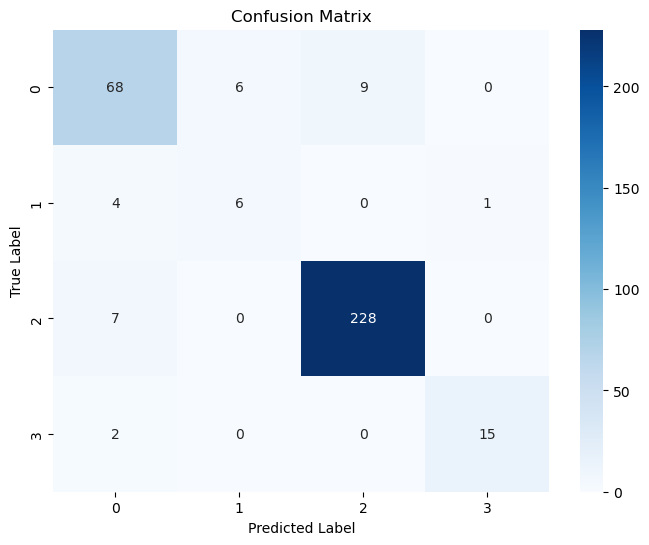

In [133]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [143]:
print(y_test.shape)

(346, 1)


In [142]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load your dataset with categorical independent features (X) and the target variable (y)
X = data3[['Column1','Column2','Column3','Column4','Column5','Column6']].values
y= data[['Code_le']].values

# One-hot encode the categorical features in X
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Set the number of bootstrap iterations
n_bootstrap =500

# Initialize lists to store bootstrap results
accuracy_scores = []
intercept_values = []
coefficient_values = []

for _ in range(n_bootstrap):
    # Generate a bootstrap sample by sampling with replacement from the training set
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=_)
    
    # Create the Logistic Regression model
    logistic_model = LogisticRegression()
    
    # Fit the model on the bootstrap sample
    logistic_model.fit(X_bootstrap, y_bootstrap)
    
    # Evaluate the model on the original testing set and store the accuracy
    accuracy = logistic_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    
    # Store the intercept and coefficient values for this iteration
    intercept_values.append(logistic_model.intercept_)
    coefficient_values.append(logistic_model.coef_)

# Calculate the mean accuracy and its confidence interval
mean_accuracy = np.mean(accuracy_scores)
confidence_interval = np.percentile(accuracy_scores, [2.5, 97.5])

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"95% Confidence Interval of Accuracy: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")

# Calculate the mean and standard deviation of intercept and coefficient values
mean_intercept = np.mean(intercept_values, axis=0)
mean_coefficients = np.mean(coefficient_values, axis=0)
std_intercept = np.std(intercept_values, axis=0)
std_coefficients = np.std(coefficient_values, axis=0)

print("Mean Intercept:", mean_intercept)
print("Mean Coefficients:", mean_coefficients)
print("Standard Deviation of Intercept:", std_intercept)
print("Standard Deviation of Coefficients:", std_coefficients)


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Mean Accuracy: 0.91
95% Confidence Interval of Accuracy: 0.89 - 0.93
Mean Intercept: [ 1.34437562 -2.68384715  5.85435143 -4.5148799 ]
Mean Coefficients: [[ 9.66242523e-01 -9.96589152e-01 -4.32375821e-01  4.62531977e-01
   4.80238508e-01 -8.33669091e-01 -2.34719938e-01  5.87960048e-01
  -1.51926158e-01  6.12108465e-02  3.99569261e-02  5.05679131e-02
  -1.26333328e+00  6.23980112e-01  6.39162698e-01 -2.11961051e-01
  -1.35830939e-01  3.47601517e-01  3.19316087e-01 -1.43817406e+00
   1.11866750e+00]
 [-1.22209279e+00  1.57712956e+00  8.97913233e-01 -1.25257136e+00
  -1.37890643e+00  1.71146208e+00  9.00088499e-01 -1.23226550e+00
  -1.22461355e-01  7.86961800e-02  4.54748950e-02 -1.33107273e-03
  -1.32659225e+00  7.84879089e-01  5.42091809e-01 -2.35243330e-02
   9.77622784e-02 -7.38592982e-02  4.81141101e-01 -1.45819678e+00
   9.77434330e-01]
 [ 1.59399001e+00 -2.32531069e+00 -1.58628353e+00  2.31760768e+00
   8.38873272e-01 -1.83908138e+00 -1.48736510e+00  2.48757667e+00
   8.43453406e-0

In [145]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Load your dataset with categorical independent features (X) and the target variable (y)

# Separate features (X) and target (y)
X = data3[['Column1','Column2','Column3','Column4','Column5','Column6']].values
y= data[['Code_le']].values

# One-hot encode the categorical features in X
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Initialize LOOCV
loo = LeaveOneOut()

# Initialize an empty list to store the accuracy scores
accuracy_scores = []

# Perform LOOCV
for train_index, test_index in loo.split(X_encoded):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the Logistic Regression model
    logistic_model = LogisticRegression()

    # Fit the model on the training data
    logistic_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = logistic_model.predict(X_test)

    # Calculate accuracy for this fold and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print(f"Mean Accuracy: {mean_accuracy:.2f}")


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Mean Accuracy: 0.91


In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your data into a pandas DataFrame (replace 'your_data.csv' with your data file)
# Assuming data2 contains the features and data contains the target variable Code_le
# Replace 'Column1', 'Column2', and 'Column4' with the actual column names in your dataset
X = data2[['Column1', 'Column2', 'Column4','Column3']].values
y = data['Code_le'].values  # Use y as a 1D array for multiclass labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Logistic Regression model with L1 regularization (sparse logistic regression)
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the coefficients of the selected features
coefficients = logistic_model.coef_
print("Coefficients:")
print(coefficients)


Accuracy: 0.67
Coefficients:
[[-0.17122271 -0.0935304   1.03891331  0.19348299]
 [-0.14809663 -0.17964164  0.70232889 -0.03339066]
 [ 0.20070148  0.1869665  -1.18727356 -0.20965686]
 [-0.10422715 -0.37050651  0.77942668  0.18324998]]
